In [8]:
import pandas as pd
Phishing_Data = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
Phishing_Data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Since DBSCAN struggles with high dimensional datasets, it is best to reduce the dataset to its top 10 features based on feature importance as calculated in the Week 9 Juypter NoteBook. 

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = Phishing_Data[["google_index","page_rank","nb_hyperlinks","nb_www","web_traffic","domain_age","nb_qm","phish_hints","longest_word_path","nb_hyphens"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN() 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: -0.189


Since this is a very bad silhoutte score, let's vary the epsilon parameter and Min Pts (min_samples) parameters as shown below. 

In [7]:
import numpy as np
for e in np.linspace(0.5,10.0,10):
    for s in np.arange(2,12):
        dbscan = DBSCAN(eps=e,min_samples=s)
        cluster_labels = dbscan.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for epsilon ={e} and min samples {s}: {silhouette_avg:.3f}")

Silhouette Score for epsilon =0.5 and min samples 2: -0.209
Silhouette Score for epsilon =0.5 and min samples 3: -0.222
Silhouette Score for epsilon =0.5 and min samples 4: -0.193
Silhouette Score for epsilon =0.5 and min samples 5: -0.189
Silhouette Score for epsilon =0.5 and min samples 6: -0.176
Silhouette Score for epsilon =0.5 and min samples 7: -0.199
Silhouette Score for epsilon =0.5 and min samples 8: -0.195
Silhouette Score for epsilon =0.5 and min samples 9: -0.173
Silhouette Score for epsilon =0.5 and min samples 10: -0.160
Silhouette Score for epsilon =0.5 and min samples 11: -0.138
Silhouette Score for epsilon =1.5555555555555556 and min samples 2: 0.129
Silhouette Score for epsilon =1.5555555555555556 and min samples 3: 0.140
Silhouette Score for epsilon =1.5555555555555556 and min samples 4: 0.152
Silhouette Score for epsilon =1.5555555555555556 and min samples 5: 0.156
Silhouette Score for epsilon =1.5555555555555556 and min samples 6: 0.172
Silhouette Score for epsilon

When epsilon is approximately equal to 8.9 and Min Pts is set to 6, we get a silhoutte score of approximately 0.833. Let's see how phishing and legitimate urls are represented in the clusters. 

In [8]:
dbscan = DBSCAN(eps=8.9,min_samples=6)
cluster_labels = dbscan.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table



Clusters,-1,0
status,,
legitimate,1,5714
phishing,3,5712


While it is true that the outliers are mostly phishing, there are only 4 outliers out of over 10000 points. The rest are in one big cluster. The parameters could be too large so let's try something else that still gives us a relatively high silhouette score (at least 0.6). 

In [10]:
dbscan = DBSCAN(eps=3.7,min_samples=6)
cluster_labels = dbscan.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,-1,0,1
status,,,
legitimate,6,5709,0
phishing,20,5682,13


It is clear that while most outliers are phishing urls, the bulk of all urls, phishing and legitimate, fall into one big cluster. This indicates very limited separability. 

In [11]:
import pandas as pd
Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
Email.head()

,Unnamed: 0,Email Text,Email Type,num_chars,num_words,avg_word_len,num_sentences,num_capitals,num_exclamations,num_question_marks,num_special_chars,num_digits,num_urls
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030.0,230.0,3.482609,9.0,0.0,2.0,0.0,59.0,9.0,0.0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479.0,91.0,4.274725,6.0,0.0,0.0,2.0,16.0,0.0,0.0
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245.0,305.0,3.085246,7.0,0.0,0.0,1.0,95.0,63.0,0.0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688.0,96.0,5.500000,38.0,39.0,1.0,1.0,110.0,29.0,1.0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441.0,91.0,3.857143,13.0,0.0,0.0,0.0,27.0,2.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN() 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: -0.202


Given this bad score, we will need to do what we did with the previous dataset: vary epsilon and Min Pts

In [14]:
import numpy as np
for e in np.linspace(0.5,10.0,10):
    for s in np.arange(2,12):
        dbscan = DBSCAN(eps=e,min_samples=s)
        cluster_labels = dbscan.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for epsilon ={e} and min samples {s}: {silhouette_avg:.3f}")

Silhouette Score for epsilon =0.5 and min samples 2: -0.208
Silhouette Score for epsilon =0.5 and min samples 3: -0.208
Silhouette Score for epsilon =0.5 and min samples 4: -0.201
Silhouette Score for epsilon =0.5 and min samples 5: -0.202
Silhouette Score for epsilon =0.5 and min samples 6: -0.192
Silhouette Score for epsilon =0.5 and min samples 7: -0.189
Silhouette Score for epsilon =0.5 and min samples 8: -0.188
Silhouette Score for epsilon =0.5 and min samples 9: -0.185
Silhouette Score for epsilon =0.5 and min samples 10: -0.171
Silhouette Score for epsilon =0.5 and min samples 11: -0.206
Silhouette Score for epsilon =1.5555555555555556 and min samples 2: 0.072
Silhouette Score for epsilon =1.5555555555555556 and min samples 3: 0.271
Silhouette Score for epsilon =1.5555555555555556 and min samples 4: 0.390
Silhouette Score for epsilon =1.5555555555555556 and min samples 5: 0.421
Silhouette Score for epsilon =1.5555555555555556 and min samples 6: 0.395
Silhouette Score for epsilon

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Since there is just one big cluster when epsilon increases beyond approximately 5.8, we should pick the first epsilon values that give us the maximum score (0.756). That would be when eps is approximately equal to 5.8 and Min Pts is equal to 2. 

In [21]:
dbscan = DBSCAN(eps=5.8,min_samples=2)
cluster_labels = dbscan.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,-1,0
Email Type,,
Phishing Email,1,6977
Safe Email,1,10737


There are only 2 outliers and one of them is phishing. This indicates that the bulk of the data fits within one cluster. Let's see if this is the case if we reduce the parameters to values that still gives us a relatively high silhoutte score (around 0.6). 

In [13]:
dbscan = DBSCAN(eps=2.6,min_samples=3)
cluster_labels = dbscan.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,-1,0,1,2,3,4,5,6,7,8,9
Email Type,,,,,,,,,,,
Phishing Email,74,6880,3,4,0,3,2,3,3,3,3
Safe Email,63,10665,0,0,3,0,7,0,0,0,0


While the outliers have a phishing majority albeit slight, the bulk of all data points are part of the big cluster, indicating limited separability between the two classes. 

In [1]:
import pandas as pd
URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
URL.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
URL = URL.head(10000)
X = URL.drop("phishing",axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN() 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.252


This is not a good silhoutte score so let's whether we can improve on this by varying the epsilon and Min Pts parameters

In [3]:
import numpy as np
for e in np.linspace(0.5,10.0,10):
    for s in np.arange(2,12):
        dbscan = DBSCAN(eps=e,min_samples=s)
        cluster_labels = dbscan.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for epsilon ={e} and min samples {s}: {silhouette_avg:.3f}")

Silhouette Score for epsilon =0.5 and min samples 2: 0.283
Silhouette Score for epsilon =0.5 and min samples 3: 0.262
Silhouette Score for epsilon =0.5 and min samples 4: 0.254
Silhouette Score for epsilon =0.5 and min samples 5: 0.252
Silhouette Score for epsilon =0.5 and min samples 6: 0.245
Silhouette Score for epsilon =0.5 and min samples 7: 0.239
Silhouette Score for epsilon =0.5 and min samples 8: 0.232
Silhouette Score for epsilon =0.5 and min samples 9: 0.234
Silhouette Score for epsilon =0.5 and min samples 10: 0.222
Silhouette Score for epsilon =0.5 and min samples 11: 0.200
Silhouette Score for epsilon =1.5555555555555556 and min samples 2: 0.320
Silhouette Score for epsilon =1.5555555555555556 and min samples 3: 0.347
Silhouette Score for epsilon =1.5555555555555556 and min samples 4: 0.349
Silhouette Score for epsilon =1.5555555555555556 and min samples 5: 0.356
Silhouette Score for epsilon =1.5555555555555556 and min samples 6: 0.354
Silhouette Score for epsilon =1.555555

The 10 epsilon and 2 Min Pts  parameters gave us the highest silhoutte score (0.759). Let's use that. 

In [4]:
dbscan = DBSCAN(eps = 10.0 ,min_samples=2)
cluster_labels = dbscan.fit_predict(X_scaled)
URL["Clusters"] = cluster_labels
Table = pd.crosstab(URL["phishing"],URL["Clusters"])
Table

Clusters,-1,0,1,2,3,4,5,6,7,8,9,10,11
phishing,,,,,,,,,,,,,
0,2,4962,0,18,5,1,0,0,0,0,1,1,0
1,11,4928,7,43,0,2,2,6,4,2,1,2,2


There are thirteen outliers identified, all of them phishing. The second largest cluster is majority phishing urls.  The bulk of all samples are in one big cluster however, indicating limited separability. 

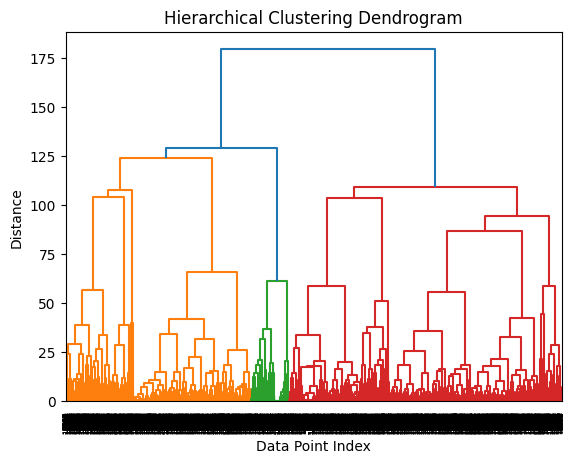

In [10]:
import pandas as pd
import numpy as np
Phishing_Data = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
X = Phishing_Data[["google_index","page_rank","nb_hyperlinks","nb_www","web_traffic","domain_age","nb_qm","phish_hints","longest_word_path","nb_hyphens"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
orientation='top', # Orientation of the dendrogram
labels=np.arange(len(X_scaled)).astype(str), # Labels for leaf nodes
distance_sort='descending', # Sort leaves by distance
show_leaf_counts=True) # Show the number of original observations in each leaf
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()





Based on this, the dataset forms 2 - 3 big clusters. Let's set a range for number of clusters (i.e. 2 - 10) and then calculate the silhoutte score of each cluster based on the agglomerative clustering algorithm. The linkeage parameter should also be varied. 

In [11]:
linkeage_type = ["ward", "complete", "average", "single"]
from sklearn.cluster import AgglomerativeClustering
for c in range(2,10):
    for l in linkeage_type:
        clustering = AgglomerativeClustering(n_clusters=c,linkage=l)
        cluster_labels = clustering.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for number of clusters {c} and linkeage type {l}: {silhouette_avg:.3f}")
        


Silhouette Score for number of clusters 2 and linkeage type ward: 0.176
Silhouette Score for number of clusters 2 and linkeage type complete: 0.792
Silhouette Score for number of clusters 2 and linkeage type average: 0.837
Silhouette Score for number of clusters 2 and linkeage type single: 0.886
Silhouette Score for number of clusters 3 and linkeage type ward: 0.191
Silhouette Score for number of clusters 3 and linkeage type complete: 0.789
Silhouette Score for number of clusters 3 and linkeage type average: 0.777
Silhouette Score for number of clusters 3 and linkeage type single: 0.758
Silhouette Score for number of clusters 4 and linkeage type ward: 0.150
Silhouette Score for number of clusters 4 and linkeage type complete: 0.740
Silhouette Score for number of clusters 4 and linkeage type average: 0.768
Silhouette Score for number of clusters 4 and linkeage type single: 0.758
Silhouette Score for number of clusters 5 and linkeage type ward: 0.162
Silhouette Score for number of cluste

Single linkage with two clusters gives us the greatest silhoutte score so let's use that. 

In [13]:
clustering = AgglomerativeClustering(n_clusters=2,linkage="single")
cluster_labels = clustering.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,0,1
status,,
legitimate,5715,0
phishing,5714,1


There is one big cluster and a small cluster consisting of one point. Let's try another set of parameters that gives a silhoutte score of at least around 0.6. 

In [17]:
clustering = AgglomerativeClustering(n_clusters=8,linkage="average")
cluster_labels = clustering.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,0,1,2,3,4,5,6,7
status,,,,,,,,
legitimate,5706,0,1,2,0,0,6,0
phishing,5647,61,1,0,2,1,0,3


While there is some slight spread between the clusters, the bulk of all points are in the first one. This indicates that there isn't much diversity in the dataset and that the clustering algorithm can't effectively distinguish between the two classes even if the second largest cluster is entirely phishing. 

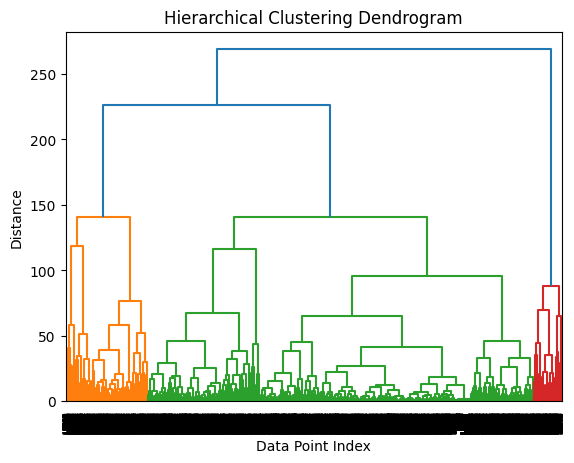

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
orientation='top', # Orientation of the dendrogram
labels=np.arange(len(X_scaled)).astype(str), # Labels for leaf nodes
distance_sort='descending', # Sort leaves by distance
show_leaf_counts=True) # Show the number of original observations in each leaf
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [22]:
linkeage_type = ["ward", "complete", "average", "single"]
from sklearn.cluster import AgglomerativeClustering
for c in range(2,10):
    for l in linkeage_type:
        clustering = AgglomerativeClustering(n_clusters=c,linkage=l)
        cluster_labels = clustering.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for number of clusters {c} and linkeage type {l}: {silhouette_avg:.3f}")

Silhouette Score for number of clusters 2 and linkeage type ward: 0.559
Silhouette Score for number of clusters 2 and linkeage type complete: 0.599
Silhouette Score for number of clusters 2 and linkeage type average: 0.676
Silhouette Score for number of clusters 2 and linkeage type single: 0.764
Silhouette Score for number of clusters 3 and linkeage type ward: 0.427
Silhouette Score for number of clusters 3 and linkeage type complete: 0.602
Silhouette Score for number of clusters 3 and linkeage type average: 0.660
Silhouette Score for number of clusters 3 and linkeage type single: 0.746
Silhouette Score for number of clusters 4 and linkeage type ward: 0.406
Silhouette Score for number of clusters 4 and linkeage type complete: 0.601
Silhouette Score for number of clusters 4 and linkeage type average: 0.654
Silhouette Score for number of clusters 4 and linkeage type single: 0.746
Silhouette Score for number of clusters 5 and linkeage type ward: 0.240
Silhouette Score for number of cluste

It is interesting to note how silhoutte score decreases with number of clusters for ward and complete linkage but for the others, there is more of a complex trend. Let's try the parameters that gave us the highest silhoutte score (single linkage, 6 clusters).

In [6]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6,linkage="single")
cluster_labels = clustering.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,0,1,2,3,4,5
Email Type,,,,,,
Phishing Email,6975,2,0,0,1,0
Safe Email,10735,0,1,1,0,1


Basically, there is just one big cluster and a few tiny clusters. Two of these tiny clusters have phishing emails but since the almost all of the other phishing emails are in the big cluster, there isn't much if any separability between the two classes. Let's try the same number of clusters but with average instead since that gives almost the same silhouette score. 

In [11]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6,linkage="average")
cluster_labels = clustering.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,0,1,2,3,4,5
Email Type,,,,,,
Phishing Email,6,110,6850,7,4,1
Safe Email,7,157,10555,1,18,0


While most of the emails still are part of one big cluster (Cluster 2), there is much more of a spread. However, phishing emails are not the majority anywhere aside from the Cluster 5 where they are there is just one email. 

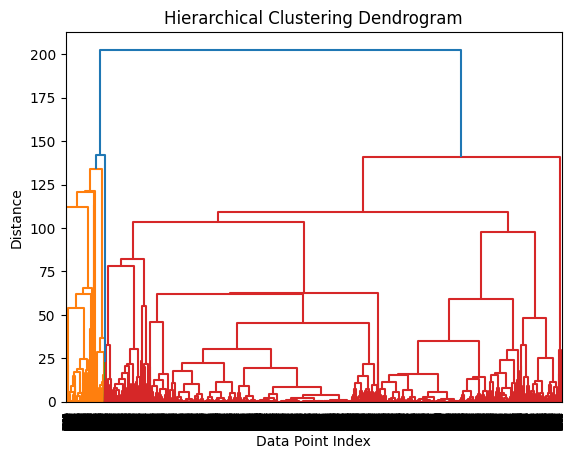

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
URL = URL.head(10000)
X = URL.drop("phishing",axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
orientation='top', # Orientation of the dendrogram
labels=np.arange(len(X_scaled)).astype(str), # Labels for leaf nodes
distance_sort='descending', # Sort leaves by distance
show_leaf_counts=True) # Show the number of original observations in each leaf
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [7]:
linkage_type = ["ward", "complete", "average", "single"]
from sklearn.cluster import AgglomerativeClustering
for c in range(2,10):
    for l in linkage_type:
        clustering = AgglomerativeClustering(n_clusters=c,linkage=l)
        cluster_labels = clustering.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for number of clusters {c} and linkeage type {l}: {silhouette_avg:.3f}")

Silhouette Score for number of clusters 2 and linkeage type ward: 0.636
Silhouette Score for number of clusters 2 and linkeage type complete: 0.953
Silhouette Score for number of clusters 2 and linkeage type average: 0.932
Silhouette Score for number of clusters 2 and linkeage type single: 0.953
Silhouette Score for number of clusters 3 and linkeage type ward: 0.630
Silhouette Score for number of clusters 3 and linkeage type complete: 0.890
Silhouette Score for number of clusters 3 and linkeage type average: 0.930
Silhouette Score for number of clusters 3 and linkeage type single: 0.904
Silhouette Score for number of clusters 4 and linkeage type ward: 0.641
Silhouette Score for number of clusters 4 and linkeage type complete: 0.823
Silhouette Score for number of clusters 4 and linkeage type average: 0.917
Silhouette Score for number of clusters 4 and linkeage type single: 0.905
Silhouette Score for number of clusters 5 and linkeage type ward: 0.642
Silhouette Score for number of cluste

Single linkage with two clusters gives us the highest silhouette score. Let's try that. 

In [8]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage="single")
cluster_labels = clustering.fit_predict(X_scaled)
URL["Clusters"] = cluster_labels
Table = pd.crosstab(URL["phishing"],URL["Clusters"])
Table

Clusters,0,1
phishing,,
0,4990,0
1,5009,1


We basically have one giant cluster and 1 small cluster with a phishing url. Let's try the same number of clusters but with ward linkage instead. 

In [9]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage="ward")
cluster_labels = clustering.fit_predict(X_scaled)
URL["Clusters"] = cluster_labels
Table = pd.crosstab(URL["phishing"],URL["Clusters"])
Table

Clusters,0,1
phishing,,
0,39,4951
1,754,4256


Now, we have a substantial cluster that is majority phishing. However, most phishing urls are in the larger non-phishing (slight) majority cluster so separability is limited. 